## Run Model

In [1]:
# Dependences
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Experiments
from model import run
from model.parts.utils import *
from model.plot_utils import *

pd.options.display.float_format = '{:.2f}'.format

%matplotlib inline

df = run.run()
rdf = run.postprocessing(df)

running file: run.py
running file: asset_utils.py
end of file: asset_utils.py
running file: sim_setup.py
end of file: sim_setup.py
end of file: run.py

                  ___________    ____
  ________ __ ___/ / ____/   |  / __ \
 / ___/ __` / __  / /   / /| | / / / /
/ /__/ /_/ / /_/ / /___/ ___ |/ /_/ /
\___/\__,_/\__,_/\____/_/  |_/_____/
by cadCAD

Execution Mode: local_proc
Configuration Count: 1
Dimensions of the first simulation: (Timesteps, Params, Runs, Vars) = (100, 19, 3, 29)
Execution Method: local_simulations
SimIDs   : [0, 0, 0]
SubsetIDs: [0, 1, 2]
Ns       : [0, 1, 2]
ExpIDs   : [0, 0, 0]
Execution Mode: parallelized
{'q_sold': 2100, 'ri_sold': 1050, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 10.5, 'fees': [], 'oracle_price_i': 1, 'oracle_price_j': 2, 'oracle_price_hydra': 2, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1050
 R

{'q_sold': 1924, 'ri_sold': 3848, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 9.620000000000001, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  3848
 R removed from pool of  i  =  2985.9184076422825
{'q_sold': 1866, 'ri_sold': 3732, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 9.33, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  3732
 R removed from pool of  i  =  2858.518174392637
{'q_sold': 2124, 'ri_sold': 1062, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 't

{'q_sold': 2262, 'ri_sold': 1131, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 11.31, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1131
 R removed from pool of  j  =  1450.0868319505826
{'q_sold': 1680, 'ri_sold': 840, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 8.4, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  840
 R removed from pool of  j  =  1072.3093181487639
{'q_sold': 2038, 'ri_sold': 4076, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 

 R removed from pool of  i  =  3424.245336560067
{'q_sold': 1870, 'ri_sold': 3740, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j', 'direction': 'ji', 'direction_q': 'test_r_for_r', 'fee': 9.35, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'i'}
 R to R swap called 
 R added to pool of  j  =  3740
 R removed from pool of  i  =  3141.650422579143
{'q_sold': 2430, 'ri_sold': 1215, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'i', 'direction': 'ij', 'direction_q': 'test_r_for_r', 'fee': 12.15, 'fees': [], 'oracle_price_i': 0, 'oracle_price_j': 0, 'oracle_price_hydra': 0, 'purchased_asset_id': 'j'}
 R to R swap called 
 R added to pool of  i  =  1215
 R removed from pool of  j  =  1452.3463273509406
{'q_sold': 2128, 'ri_sold': 4256, 'ri_deposit': 0, 'q_deposit': 0, 'Si_burn': 0, 'action_id': 'R_Swap', 'agent_id': 5, 'asset_id': 'j',

In [2]:
rdf

,UNI_Qi,UNI_Ri,UNI_Si,UNI_Qj,UNI_Rj,UNI_Sj,UNI_ij,UNI_ji,UNI_Sij,uni_agents,...,fee_revenue,fee_revenue_2,oracle_price_i,oracle_price_j,oracle_price_hydra,simulation,subset,run,substep,timestep
3,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,{'i': 10.5},"[0, 0, 0]",1,2,2,0,0,1,3,1
6,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,{'i': 20.37},"[0, 0, 0]",1,2,2,0,0,1,3,2
9,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,{'i': 31.020000000000003},"[0, 0, 0]",1,2,2,0,0,1,3,3
12,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"{'i': 31.020000000000003, 'j': 11.53}","[0, 0, 0]",1,2,2,0,0,1,3,4
15,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"{'i': 40.790000000000006, 'j': 11.53}","[0, 0, 0]",1,2,2,0,0,1,3,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
890,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"{'j': 505.58, 'i': 458.72999999999996}","[0, 0, 0]",3,2,2,0,2,2,3,96
893,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"{'j': 516.48, 'i': 458.72999999999996}","[0, 0, 0]",3,2,2,0,2,2,3,97
896,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"{'j': 516.48, 'i': 469.03999999999996}","[0, 0, 0]",3,2,2,0,2,2,3,98
899,2000000,1000000,10000,2000000,1000000,10000,1000000,1000000,1000000000000,m r_i_out r_i_in h q_i ...,...,"{'j': 527.3000000000001, 'i': 469.03999999999996}","[0, 0, 0]",3,2,2,0,2,2,3,99


In [24]:
hydra = rdf[['Q', 'H', 'Sq']]

hydra.columns = ['Hydra_Q', 'Hydra_H', 'Hydra_Sq']

rdf.columns

Index(['UNI_Qi', 'UNI_Ri', 'UNI_Si', 'UNI_Qj', 'UNI_Rj', 'UNI_Sj', 'UNI_ij',
       'UNI_ji', 'UNI_Sij', 'uni_agents', 'UNI_P_RQi', 'UNI_P_RQj', 'UNI_P_ij',
       'pool', 'Q', 'H', 'Sq', 'Y', 'hydra_agents', 'C', 'asset_random_choice',
       'trade_random_size', 'trade_random_direction', 'purchased_asset_id',
       'fee_revenue', 'fee_revenue_2', 'oracle_price_i', 'oracle_price_j',
       'oracle_price_hydra', 'simulation', 'subset', 'run', 'substep',
       'timestep'],
      dtype='object')

In [25]:
print(rdf.pool[rdf.first_valid_index()])
# !!! does not run

<class 'model.parts.v2_asset_utils.V2_Asset'>: {'pool': {'i': {'R': 1001050, 'S': 1000000, 'C': 1, 'P': 1.9958066057511399, 'dP': -0.004193394248860116}, 'j': {'R': 998952.2003792038, 'S': 1000000, 'C': 1.0, 'P': 2.0041977950024252, 'dP': 0.004197795002425231}}}


In [59]:
rdf.pool[3].pool
rdf.Q[3]
# !!! does not run

4000000.0

### Define Arbitrage Wedge Plot in Code

In [62]:
def AW_plot(experiments,test_title,T):

    """
    This function plots the Arbitrage Wedge (AW) a metric that defines 
    overall potential IL in the pool due to external market prices.
    """
    
    AW = []
    V1 = []
    VH = []
     
    #Define timesteps as seen in plot_utils.py
    df = experiments
    df = df[df['substep'] == df.substep.max()]
    df.fillna(0,inplace=True)
    df.reset_index()

    #Iterate through timesteps and calculate AW for each time step.
    for i in range(df.substep.max(),T, df.substep.max()): 
        
        #Get Quantities for all assets in the pool and in the fee revenue basket.
        Ri = df.pool[i].pool['i']['R'] + df['fee_revenue'][i]['i']
        Rj = df.pool[i].pool['j']['R'] + df['fee_revenue'][i]['j']
        Q = rdf['Q'][i] #+ df['fee_revenue'][i]['Q']
        
        #Get Quantities for all shares.
        Si = df.pool[i].pool['i']['S']
        Sj = df.pool[i].pool['j']['S']           
        Sq = rdf['Sq'][i]
        
        #Get external market prices.
        #oracles = rdf[['oracle_price_i', 'oracle_price_j', 'oracle_price_Q']]
        MPi = 2#rdf['oracle_price_i'][i] #oracles['oracle_price_i']
        MPj = 2#rdf['oracle_price_j'][i] #oracles['oracle_price_j']
        MPq = 2#rdf['oracle_price_hydra'][i] #oracles['oracle_price_Q']
        
        #Calculate Arbitrage Wedge.
        Total_V1t = Ri*MPi + Rj*MPj + Q*MPq
        Total_VHt = Si*MPi + Sj*MPj + Sq*MPq
        
        V1.append(Total_V1t)
        VH.append(Total_VHt)
        
        AWt = (Total_V1t-Total_VHt) / Total_VHt
        AW.append(AWt)
    
    mathAW = np.array(AW)

    #Plot Arbitrage Wedge across timesteps.
    plt.figure(figsize=(20,6))
    
    plt.subplot(141)
    plt.plot(AW)
    plt.xlabel('Timestep')
    plt.ylabel('Arbitrage Wedge')
    plt.legend()
    
    plt.subplot(142)
    plt.plot(V1)
    
    plt.subplot(143)
    plt.plot(VH)
    

### Execute Arbitrage Plot

No handles with labels found to put in legend.


300


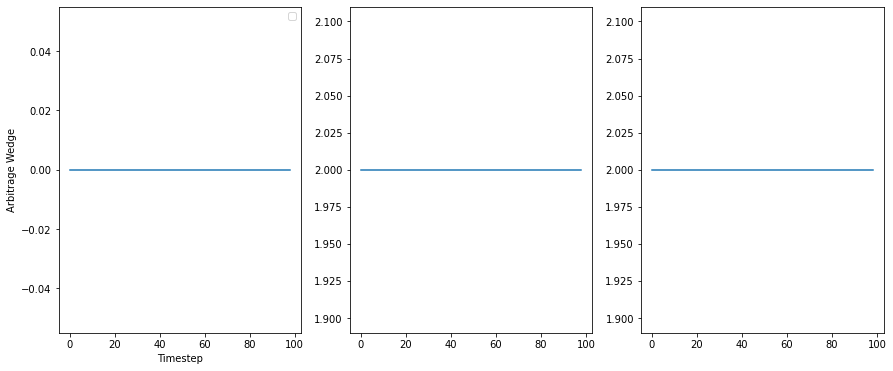

In [63]:
print(len(rdf['timestep']))
AW_plot(rdf,'Arbitrage Wedge Omnipool', len(rdf['timestep']))